# Ejercicios de Seaborn

In [28]:
# 1. Importa pandas, pyplot y seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 3. Lee 'Pokemon.csv', lee la primera columna del csv como índice del DataFrame

In [3]:
df = pd.read_csv("data/Pokemon.csv", index_col=0)
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [ ]:
# 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


In [6]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


In [ ]:
# 5. Haz un scatter plot con lmplot(), que es el método que pinta una regresión lineal
# Pasa el DataFrame como argumento del función en el parámetro llamado data

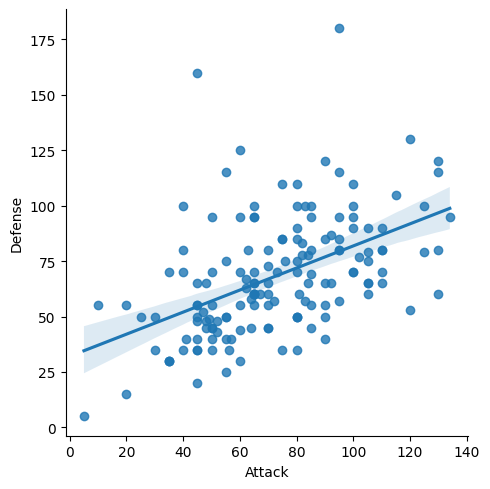

In [7]:
sns.lmplot(data = df,x= "Attack", y= "Defense");

In [ ]:
# 6. No queremos ver la línea recta de la regresión lineal.
# prueba a añadir fit_reg a falso

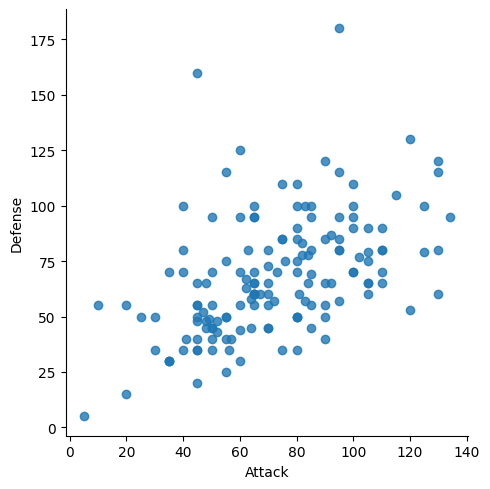

In [8]:
sns.lmplot(data = df,x= "Attack", y= "Defense", fit_reg= False);

In [ ]:
# 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue)
# Que el hue sea el Stage

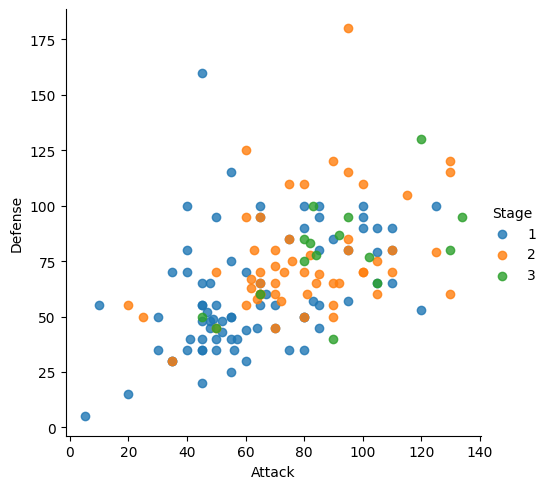

In [10]:
sns.lmplot(data = df, x= "Attack", y = "Defense",fit_reg=False, hue ="Stage")

In [ ]:
# 8. Limita el eje x entre 20 y 100

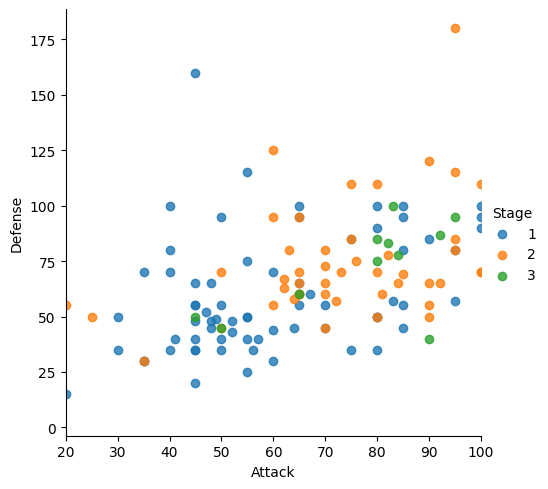

In [11]:
sns.lmplot(data = df, x= "Attack", y = "Defense",fit_reg=False, hue ="Stage")
plt.xlim(20, 100);

In [24]:
# 9. Dibuja un diagrama de cajas con el dataframe

<Axes: >

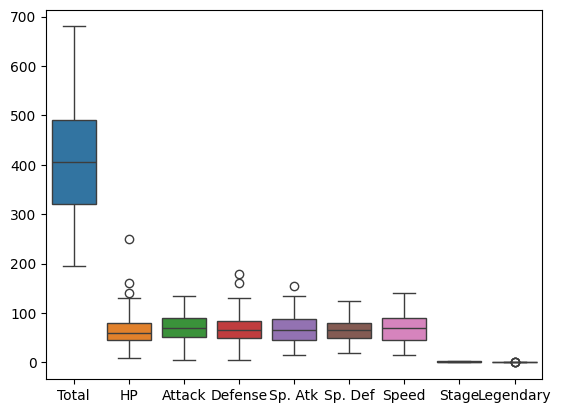

In [12]:
sns.boxplot(df)

<Axes: xlabel='HP'>

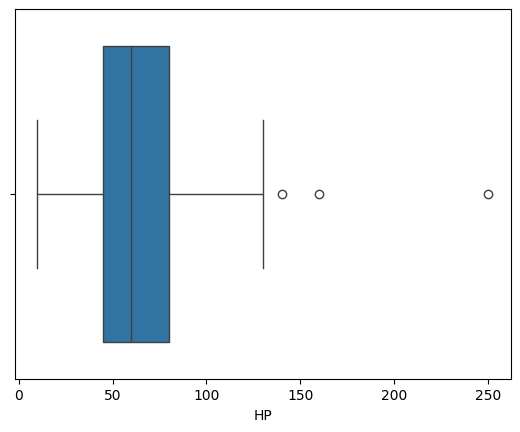

In [14]:
sns.boxplot(x = df["HP"])

<Axes: >

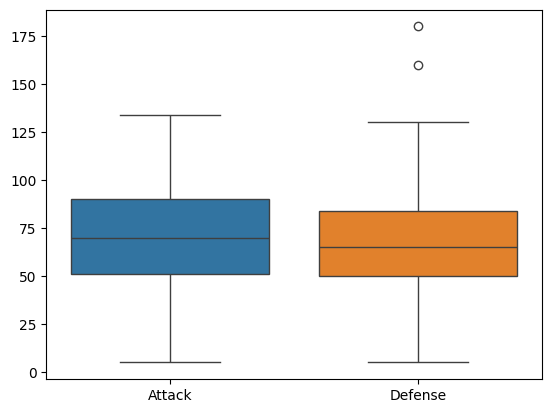

In [17]:
sns.boxplot(data = df[["Attack", "Defense"]])

In [ ]:
# 10. No nos interesan las columnas Total, Stage ni Legendary
# Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

In [19]:
df_10 = df.drop(columns=["Total", "Stage", "Legendary"])
df_10

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,41,64,45,50,50,50
148,Dragonair,Dragon,NaN,61,84,65,70,70,70
149,Dragonite,Dragon,Flying,91,134,95,100,100,80


<Axes: >

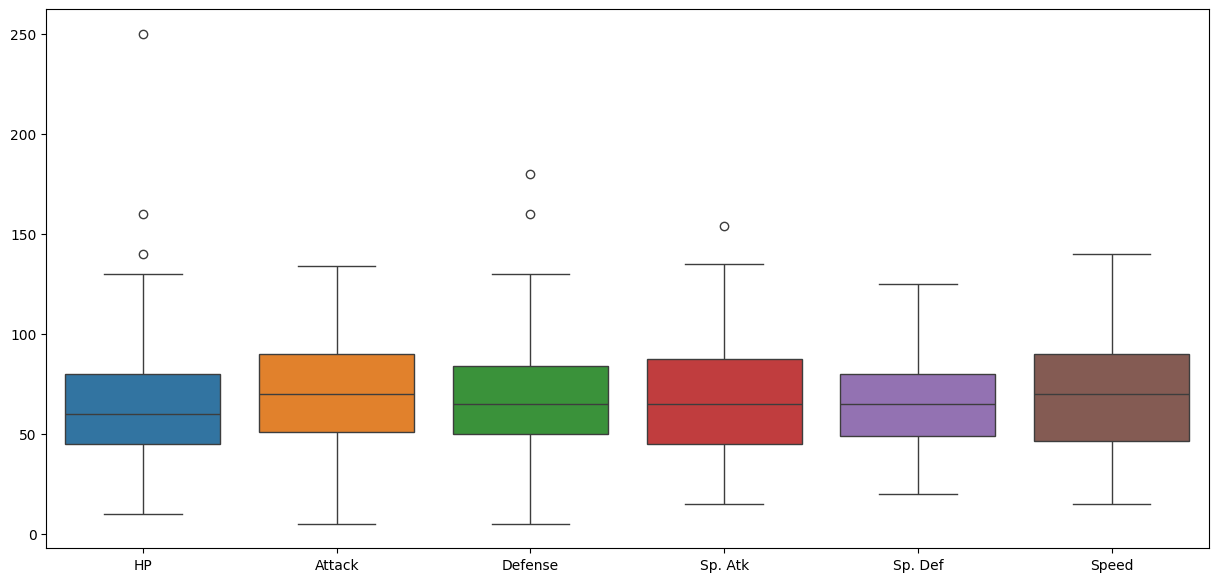

In [23]:
plt.figure(figsize=(15, 7))
sns.boxplot(df_10)

In [ ]:
# 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame

In [24]:
df["Type 1"].nunique()

15

In [25]:
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [26]:
df["Type 1"].value_counts()

Type 1
Water       28
Normal      22
Poison      14
Fire        12
Grass       12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Dragon       3
Ghost        3
Fairy        2
Ice          2
Name: count, dtype: int64

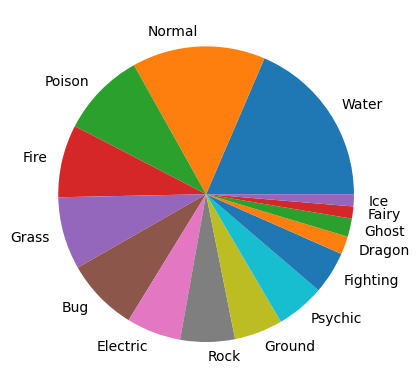

In [28]:
plt.pie(df["Type 1"].value_counts(), labels=df["Type 1"].value_counts().index);

In [ ]:
# 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water'

In [32]:
df_12 = df[df["Type 1"].isin(["Grass", "Fire", "Water"])]
df_12

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


In [ ]:
# 13. Usa un estilo 'whitegrid'

In [30]:
sns.set_style("whitegrid")

In [45]:
# 14. Pinta diagramas de violín con el DataFrame filtrado por los 3 tipos

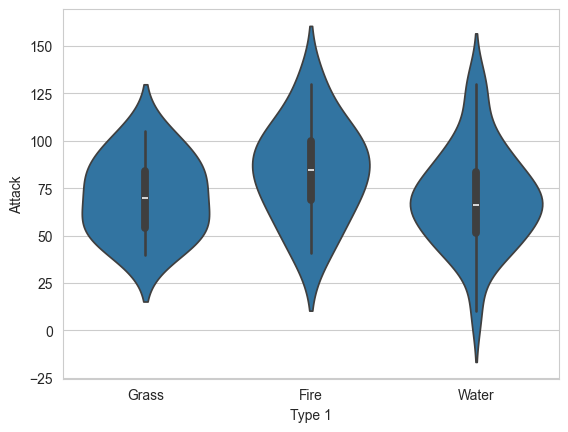

In [33]:
sns.violinplot(x = "Type 1", y = "Attack", data = df_12);

In [ ]:
# 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'

In [34]:
colores = ['#78C850', '#F08030',  '#6890F0']

In [ ]:
# 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette)

C:\Users\Diego Nuñez\AppData\Local\Temp\ipykernel_21384\2460095007.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "Type 1", y = "Attack", data = df_12, palette=colores);


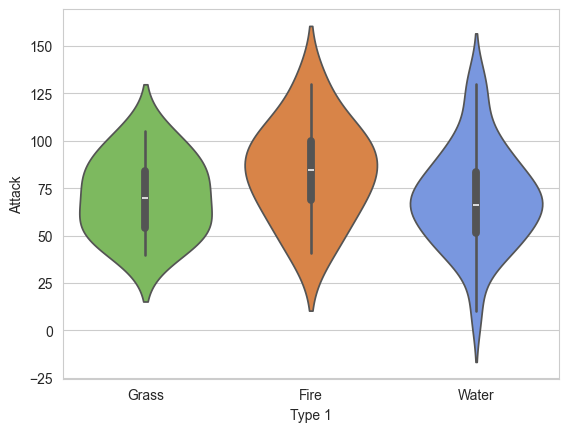

In [35]:
sns.violinplot(x = "Type 1", y = "Attack", data = df_12, palette=colores);

In [ ]:
# 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.
# Para ver esto, usamos el swarmplot.
# Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin

C:\Users\Diego Nuñez\AppData\Local\Temp\ipykernel_21384\2028001396.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = "Type 1", y = "Attack", palette=colores, data = df_12);


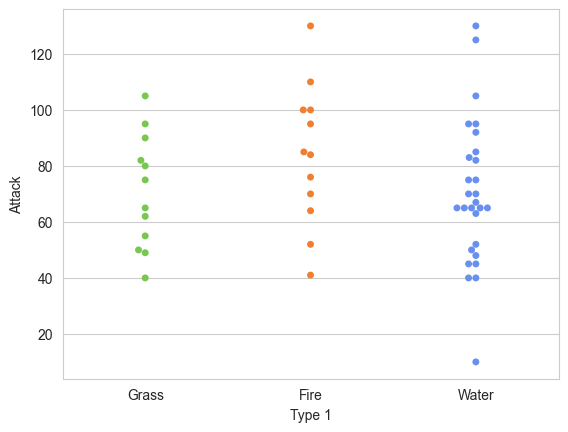

In [36]:
sns.swarmplot(x = "Type 1", y = "Attack", palette=colores, data = df_12);

In [61]:
# 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 
# Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9 en el swarmplot
# Pon un título con pyplot (como siempre)

C:\Users\Diego Nuñez\AppData\Local\Temp\ipykernel_21384\1217695106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "Type 1", y = "Attack", data = df_12, palette=colores, inner= None);


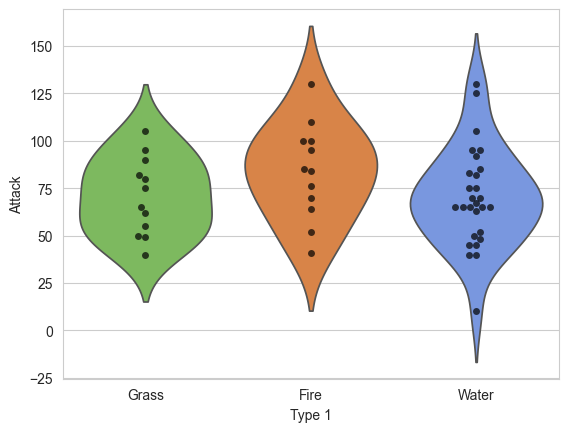

In [46]:
sns.violinplot(x = "Type 1", y = "Attack", data = df_12, palette=colores, inner= None);
sns.swarmplot(x = "Type 1", y = "Attack", color="k" ,data = df_12, alpha = 0.7);

In [ ]:
# 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.
# Dado un DataFrame, melt recibe varios parámetros:
# * qué columnas del DataFrame se quedan igual
# * qué nombres de columnas del dataframe pasan a ser una columna nueva
# * cómo queremos llamar esas nuevas columnas

# Primero recuerda el Dataframe df_grass_fire_water con las primeras 5 filas

In [47]:
df_12.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [ ]:
# 20. Queremos dejar igual las variables 'Name' y 'Type 1'
# Queremos añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'
# Escribimos df_gfw.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column')

In [54]:
df.columns[4:10]

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [52]:
df_melt = df_12.melt(id_vars=['Name', 'Type 1'], value_vars=df.columns[4:10], var_name='New Column')
df_melt

,Name,Type 1,New Column,value
0,Bulbasaur,Grass,HP,45
1,Ivysaur,Grass,HP,60
2,Venusaur,Grass,HP,80
3,Charmander,Fire,HP,39
4,Charmeleon,Fire,HP,58
...,...,...,...,...
307,Gyarados,Water,Speed,81
308,Lapras,Water,Speed,60
309,Vaporeon,Water,Speed,65
310,Flareon,Fire,Speed,65


In [55]:
df_melt["New Column"].unique()

array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype=object)

In [56]:
df_melt["Name"].value_counts()

Name
Bulbasaur     6
Ivysaur       6
Venusaur      6
Charmander    6
Charmeleon    6
Charizard     6
Squirtle      6
Wartortle     6
Blastoise     6
Vulpix        6
Ninetales     6
Oddish        6
Gloom         6
Vileplume     6
Psyduck       6
Golduck       6
Growlithe     6
Arcanine      6
Poliwag       6
Poliwhirl     6
Poliwrath     6
Bellsprout    6
Weepinbell    6
Victreebel    6
Tentacool     6
Tentacruel    6
Ponyta        6
Rapidash      6
Slowpoke      6
Slowbro       6
Seel          6
Dewgong       6
Shellder      6
Cloyster      6
Krabby        6
Kingler       6
Exeggcute     6
Exeggutor     6
Tangela       6
Horsea        6
Seadra        6
Goldeen       6
Seaking       6
Staryu        6
Starmie       6
Magmar        6
Magikarp      6
Gyarados      6
Lapras        6
Vaporeon      6
Flareon       6
Moltres       6
Name: count, dtype: int64

In [57]:
df[df["Name"] == "Bulbasaur"]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [58]:
df_melt[df_melt["Name"] == "Bulbasaur"]

,Name,Type 1,New Column,value
0,Bulbasaur,Grass,HP,45
52,Bulbasaur,Grass,Attack,49
104,Bulbasaur,Grass,Defense,49
156,Bulbasaur,Grass,Sp. Atk,65
208,Bulbasaur,Grass,Sp. Def,65
260,Bulbasaur,Grass,Speed,45


In [61]:
pd.pivot(df_melt, columns= "New Column", values="value", index="Name")

New Column,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Arcanine,110,80,90,100,80,95
Bellsprout,75,35,50,70,30,40
Blastoise,83,100,79,85,105,78
Bulbasaur,49,49,45,65,65,45
Charizard,84,78,78,109,85,100
Charmander,52,43,39,60,50,65
Charmeleon,64,58,58,80,65,80
Cloyster,95,180,50,85,45,70
Dewgong,70,80,90,70,95,70


In [93]:
# 21. Pintamos el swarmplot con el melted y entendemos la información

<Axes: xlabel='New Column', ylabel='value'>

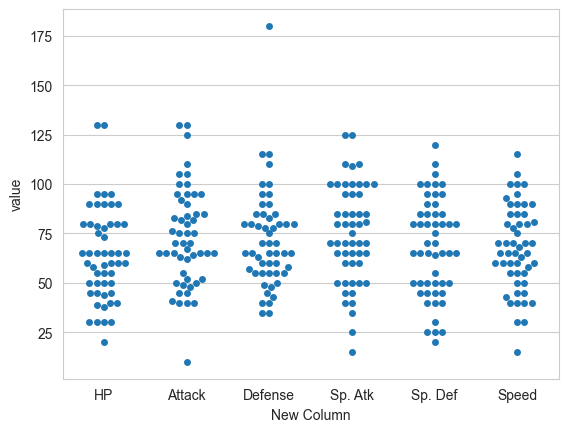

In [ ]:
sns.swarmplot(data = df_melt, x= "New Column", y= "value", hue ="New Column")

In [95]:
# 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) (usa plt)
# En el swarmplot añade el argumento dodge a True y usa la anterior paleta de colores Pokemon

# Dodge en inglés es "esquivar", ¿qué diferencia ves?

# Usando plt 
# fija el límite del eje Y entre 0 y 200
# fija la leyenda con bbox_to_anchor en upper left. Pista: upper left es el código 2 y se usa el parámetro loc.


In [68]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        312 non-null    object
 1   Type 1      312 non-null    object
 2   New Column  312 non-null    object
 3   value       312 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.9+ KB


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


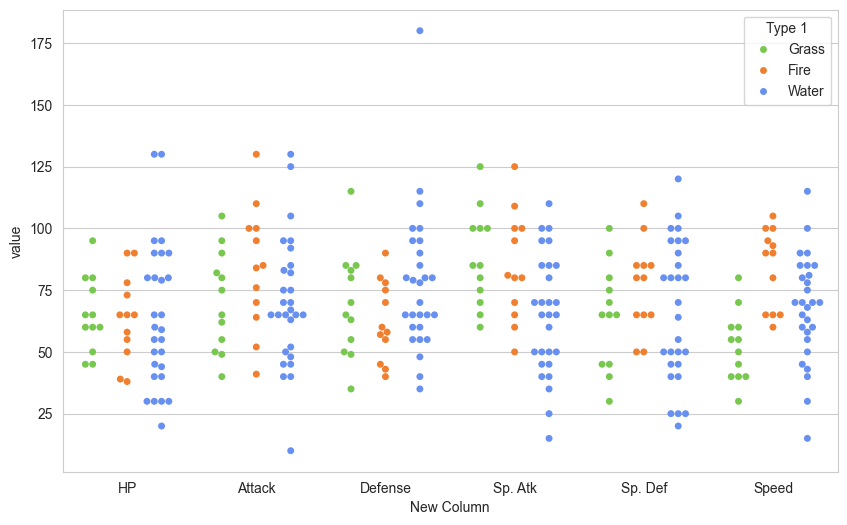

In [67]:
plt.figure(figsize=(10,6))
sns.swarmplot(data = df_melt, x = "New Column", y = "value", hue="Type 1", palette= colores, dodge = True);

In [ ]:
# 23. Mapas de calor
# Calcula las correlaciones del primer DataFrame original df
# Pista: las correlaciones se calculan con el método corr()
# Recuerda: las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

In [70]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [73]:
df_corr = df.corr(numeric_only= True)
df_corr

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224,0.328412
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207,0.172441
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321,0.147486
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861,0.141576
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712,0.334159
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308,0.215314
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042,0.199969
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000,-0.142508
Legendary,0.328412,0.172441,0.147486,0.141576,0.334159,0.215314,0.199969,-0.142508,1.000000


In [77]:
df_corr_total = df.corr(numeric_only= True)["Total"].sort_values(ascending=False)
df_corr_total

Total        1.000000
Sp. Def      0.774383
Sp. Atk      0.680745
Attack       0.670939
HP           0.576591
Defense      0.508694
Speed        0.506950
Stage        0.504224
Legendary    0.328412
Name: Total, dtype: float64

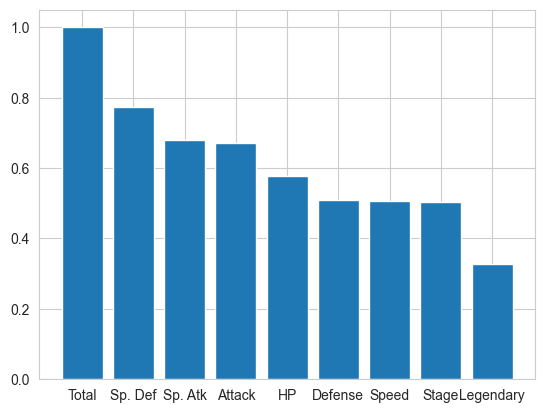

In [80]:
plt.bar(x= df_corr_total.index, height= df_corr_total.values);

<Axes: >

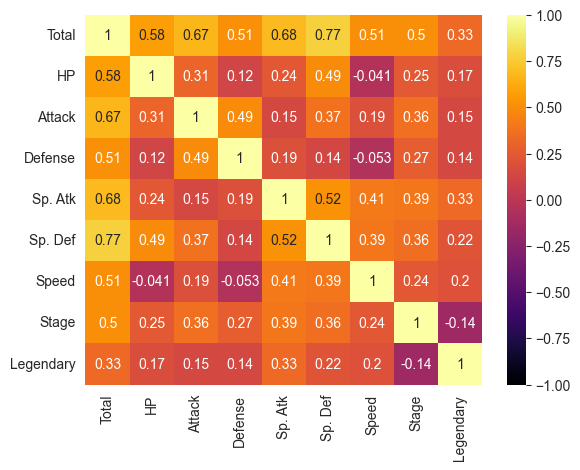

In [83]:
sns.heatmap(df.corr(numeric_only= True), vmin=-1, vmax=1,annot= True, cmap="inferno")

<Axes: >

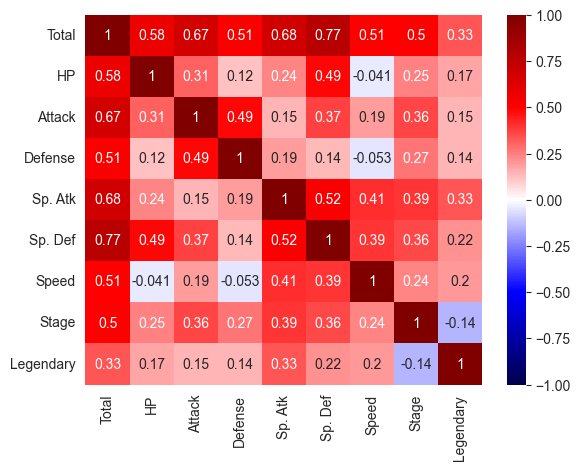

In [84]:
sns.heatmap(df.corr(numeric_only= True), vmin=-1, vmax=1,annot= True, cmap="seismic")

In [ ]:
# ¿la correlación entre qué valores se encuentra?
# la autocorrelación es la correlación de una variable consigo misma, ¿qué aprecias?
# Encuentra dos variables que veas que están fuertemente relacionadas según la correlación
# Si tuvieras una matriz de correlación muy grande y te cobrasen por cada dato que lees, ¿qué harías? (ML)

- Se encuentran entre 1 y -0.14.
- Siempre sera 1  porque crece en la misma proporción.
- 

In [ ]:
# 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original

<Axes: xlabel='Defense', ylabel='Count'>

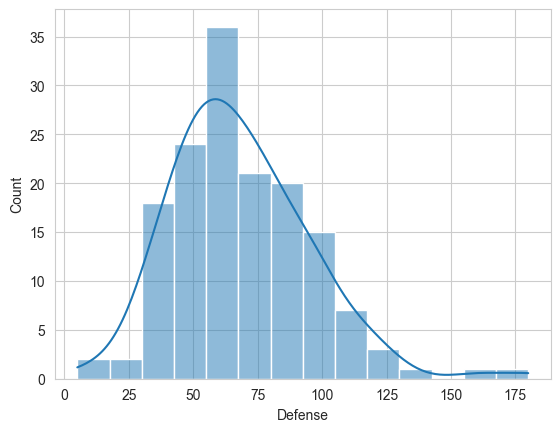

In [100]:
sns.histplot(df["Defense"], kde= True)

In [ ]:
# 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original
# Usa un sns.countplot
# Usa plt.xticks y gira las etiquetas

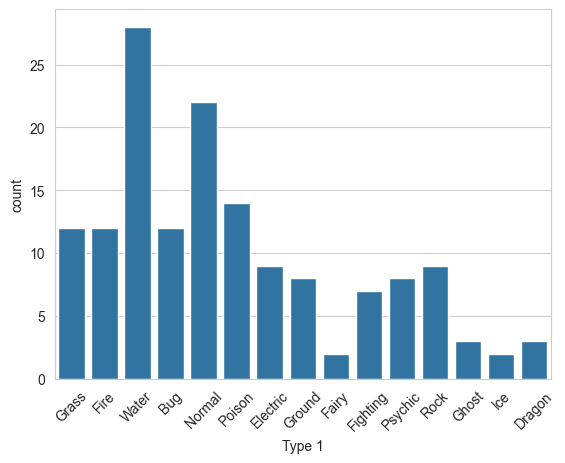

In [87]:
sns.countplot(x = "Type 1", data = df);
plt.xticks(rotation = 45, fontsize = 10);

In [ ]:
# 26. Usa catplot con el DataFrame original. Muestra el valor de Defense según el 'Type 1', muestra un subplot para legendarios y otro para no legendarios
# y divide los colores según el Type 2

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


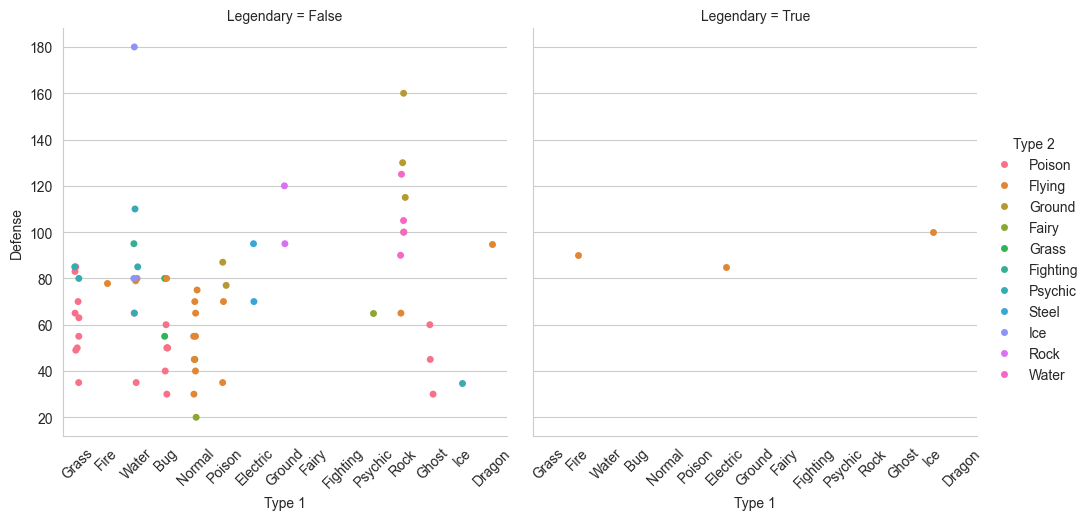

In [91]:
barras = sns.catplot(x = "Type 1", y = "Defense", data = df, hue = "Type 2", col = "Legendary")
barras.set_xticklabels(rotation = 45)

In [ ]:
# 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel) de la defensa respecto al ataque.
# Di un bin 2D donde caigan muchos puntos (ataque, defensa).

<Axes: xlabel='Attack', ylabel='Defense'>

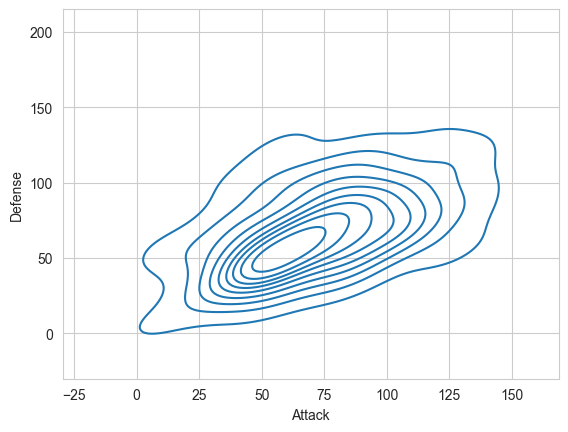

In [92]:
sns.kdeplot(x = df["Attack"], y = df["Defense"])

In [ ]:
# 28. Pinta una distribución de probabilidad conjunta con jointplot, pintando la defensa respecto al ataque del DataFrame original

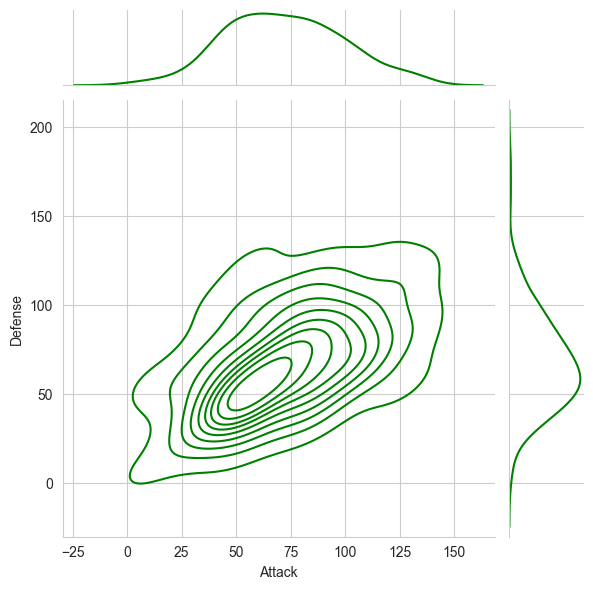

In [96]:
sns.jointplot(x = df["Attack"], y = df["Defense"],kind= "kde", color= "green")

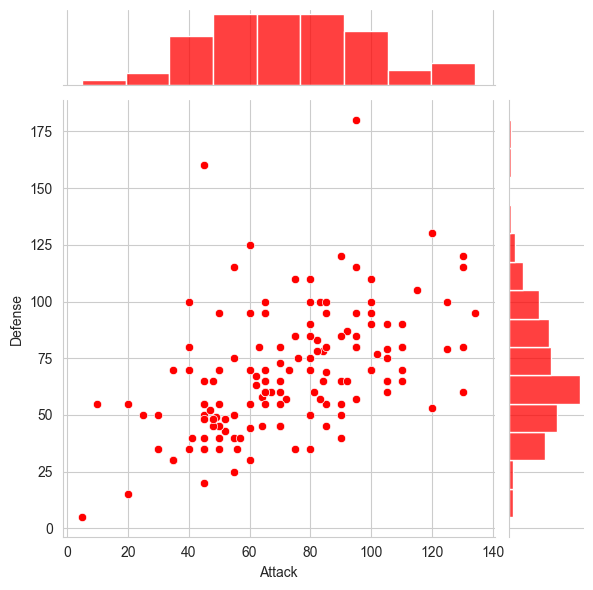

In [98]:
sns.jointplot(x = df["Attack"], y = df["Defense"], color = "red")